<a href="https://colab.research.google.com/github/roygans2398/deep-learning-tensorflow/blob/master/deep_learning_stanford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Test Colab Python Program - 'Hello World!'
s = 1
print(str(s) + '1')

11


Create a Computational Graph via 'Numpy' modules.
Compute function: (x*y) + z
Output: Scalar c (sum of all values of vector)

In [ ]:
import numpy as np
np.random.seed(0)

N, D = 3, 4

x = np.random.randn(N, D)
y = np.random.randn(N, D)
z = np.random.randn(N, D)

a = x * y
b = a + z
c = np.sum(b)

print('x matrix:\n' + str(x) + '\n')
print('y matrix:\n' + str(y) + '\n')
print('a=(x*y) matrix:\n' + str(a))

print(c)

x matrix:
[[ 1.76405235  0.40015721  0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788  0.95008842 -0.15135721]
 [-0.10321885  0.4105985   0.14404357  1.45427351]]

y matrix:
[[ 0.76103773  0.12167502  0.44386323  0.33367433]
 [ 1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502]]

a=(x*y) matrix:
[[ 1.34251038  0.04868913  0.43442581  0.74772853]
 [ 2.79027931  0.20049663  0.297442    0.12927355]
 [ 0.26351668  0.26837482  0.12451648 -1.07931093]]
6.717008537800067


Calculate Backpropagation for previous Computational Graph (via 'Numpy' modules)

In [ ]:
import numpy as np
np.random.seed(0)

N, D = 3, 4

x = np.random.randn(N, D)
y = np.random.randn(N, D)
z = np.random.randn(N, D)

a = x * y
b = a + z
c = np.sum(b)

grad_c = 1.0
grad_b = grad_c * np.ones((N, D))
grad_a = grad_b.copy()
grad_z = grad_b.copy()
grad_x = grad_a * y
grad_y = grad_a * x

print("The gradient with respect to inputs (x,y,z) is: " + str((grad_x, grad_y, grad_z)))

The gradient with respect to inputs (x,y,z) is: (array([[ 0.76103773,  0.12167502,  0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502]]), array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351]]), array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]]))


Gradient Calculation with TensorFlow modules (same as previous example Computational Graph)

TensorFlow calculates gradient automatically (without explicitly specifying backpropagation as with Numpy)

In [ ]:
import numpy as np
np.random.seed(0)
import tensorflow as tf

N, D = 3, 4

with tf.device('/gpu:0'):
  x = tf.placeholder(tf.float32, shape=())
  y = tf.placeholder(tf.float32, shape=())
  z = tf.placeholder(tf.float32, shape=())

  a = x * y
  b = a + z

  #loss function value
  c = tf.reduce_sum(b)

  grad_x, grad_y, grad_z = tf.gradients(c, [x, y, z])

with tf.Session() as sess:
  values = {
      x: np.random.randn(N, D),
      y: np.random.randn(N, D),
      z: np.random.randn(N, D)
  }

  out = sess.run([c, grad_x, grad_y, grad_z], feed_dict=values)
  c_val, grad_x_val, grad_y_val, grad_z_val = out

  print(c_val)

AttributeError: ignored

Gradient Computation in PyTorch modules (with previous computational graph)

In [ ]:
import torch
from torch.autograd import Variable

N, D = 3, 4

#can add .cuda() after torch.randn(N, D) to execute on GPU and not CPU as default

x = Variable(torch.randn(N, D), requires_grad=True)
y = Variable(torch.randn(N, D), requires_grad=True)
z = Variable(torch.randn(N, D), requires_grad=True)

a = x * y
b = a + z
c = torch.sum(b)

c.backward()

print(x.grad.data)
print(y.grad.data)
print(z.grad.data)
print(torch.cuda.is_available())

tensor([[-1.0963,  0.7732,  0.8076, -1.3650],
        [-0.7115,  0.7999,  1.3843,  2.0684],
        [-0.5252,  0.6253,  0.2275, -1.1628]])
tensor([[ 0.9165,  0.9909,  1.6288,  0.8475],
        [ 1.9316,  0.4837, -1.8765,  0.4717],
        [-0.2072, -0.1743, -0.0939,  1.8537]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
False


Keras Example

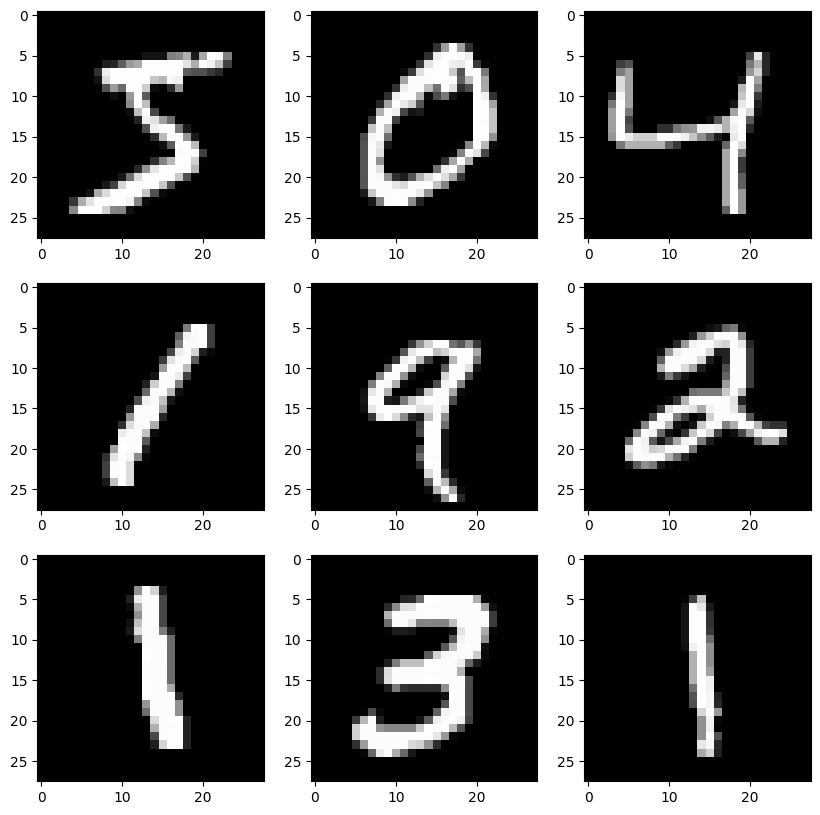

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#shape of training set 'x'
x_train.shape

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a = 0

for i in range(3):
  for j in range(3):
    axes[i, j].imshow(x_train[a], cmap = plt.get_cmap('gray'))
    a = a + 1

plt.show()

7


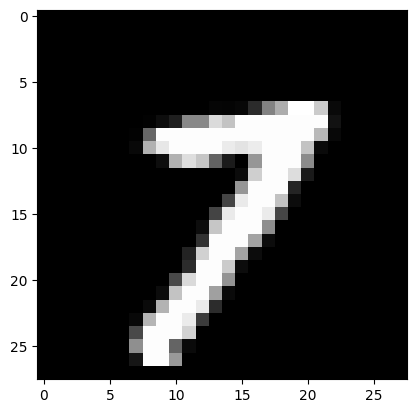

In [ ]:
print(y_train[0])
plt.imshow(x_train[0], cmap = plt.get_cmap('gray'))

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_valid, x_train = x_train[:5000] / 255, x_train[5000:] / 255
y_valid, y_train = y_train[:5000], y_train[5000:]
x_test = x_test / 255

x_train.shape

(55000, 28, 28)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28], name = "input_flattened_vector_layer"))
model.add(keras.layers.Dense(300, activation = "relu", name='fc_hidden_layer_1'))
model.add(keras.layers.Dense(100, activation = 'relu', name='fc_hidden_layer_2'))
model.add(keras.layers.Dense(10, activation = 'softmax', name = 'output_layer'))

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_flattened_vector_lay  (None, 784)               0         
 er (Flatten)                                                    
                                                                 
 fc_hidden_layer_1 (Dense)   (None, 300)               235500    
                                                                 
 fc_hidden_layer_2 (Dense)   (None, 100)               30100     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile model - configure hyperparameters such as:
1. Loss function
2. Optimizer Algorithm (SGD, SGD + Momentum, Adam,...)
3. Metrics (Accuracy, Loss Percentage)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Fit Model: add concrete data for training model:
1. Training Set (X image pixels array + Y true label array)
2. Num. of Epochs (Num. of iterations network will train whole training data)
3. Batch Size (Num. of training set examples to be fed once to Neural Network, so that after every Batch of training data - SGD Algo will run on it and update Weights/Parameters (Trainable Params) according to each batch
4. Validation Data/Split: Configure a fraction of the training data as to evaluate accuracy of model after each epoch as 'Validation Set'
5. Verbose:

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=30, batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0102 - accuracy: 0.9989 - val_loss: 0.0683 - val_accuracy: 0.9808
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0097 - accuracy: 0.9991 - val_loss: 0.0676 - val_accuracy: 0.9806
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0093 - accuracy: 0.9993 - val_loss: 0.0673 - val_accuracy: 0.9810
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0089 - accuracy: 0.9993 - val_loss: 0.0681 - val_accuracy: 0.9802
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0084 - accuracy: 0.9995 - val_loss: 0.0685 - val_accuracy: 0.9802
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0082 - accuracy: 0.9994 - val_loss: 0.0682 - val_accuracy: 0.9810
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0078 - accuracy: 0.9994 - val_loss: 0.0683 - val_accuracy:

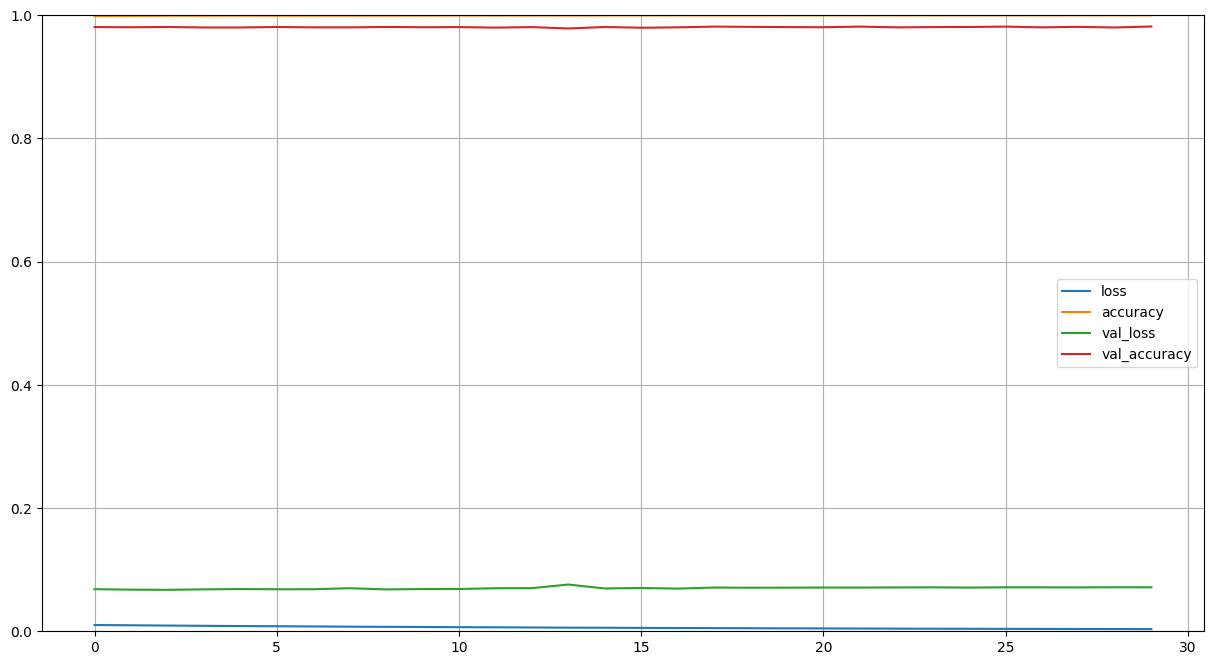

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Model Evaluation - based on Test Set

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0719 - accuracy: 0.9792


[0.0719265267252922, 0.979200005531311]

Model Prediction (based on Test Set X's only -> predict Y's labels)
Outputs for each example in the Test Set a 10x1 vector, with scores associated to each class label

In [ ]:
model.predict(x_test)

313/313 [==============================] - 3s 8ms/step


array([[3.1316645e-09, 3.0571479e-09, 1.2190115e-07, ..., 9.9998289e-01,
        1.4625475e-07, 4.6770529e-06],
       [2.0326283e-08, 1.4512983e-06, 9.9999839e-01, ..., 7.3329125e-15,
        1.2079796e-07, 3.5109503e-18],
       [1.6275149e-07, 9.9958724e-01, 8.5539950e-06, ..., 9.3037073e-05,
        2.7181857e-04, 4.1422801e-08],
       ...,
       [1.4454742e-13, 2.0284707e-12, 5.0375125e-15, ..., 2.8338299e-08,
        5.1457320e-08, 3.1991632e-07],
       [1.7254842e-10, 2.5135332e-12, 8.6851984e-16, ..., 6.6036976e-12,
        2.3149892e-07, 2.2956943e-15],
       [3.7680845e-11, 2.8231064e-15, 5.7110484e-12, ..., 1.1658527e-17,
        1.6651232e-11, 1.6809314e-15]], dtype=float32)

Extension to model.predict function
Returns an array of size of Test Set (# of examples in it), with highest score of it. Returns class label index with highest probability, based on 10x1 vector returned for each example in Test Set

In [ ]:
y_prob = model.predict(x_test)
y_predict_classes = y_prob.argmax(axis=-1)
y_predict_classes

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])